# Jellyfish Species Identification Using Unsupervised Learning

## Problem Description
This project aims to cluster jellyfish images into species based on visual features using unsupervised learning techniques. The ability to automatically categorize jellyfish can aid marine biologists in biodiversity studies and help in the monitoring of marine ecosystems, this could also be a useful tool for hobbyists.




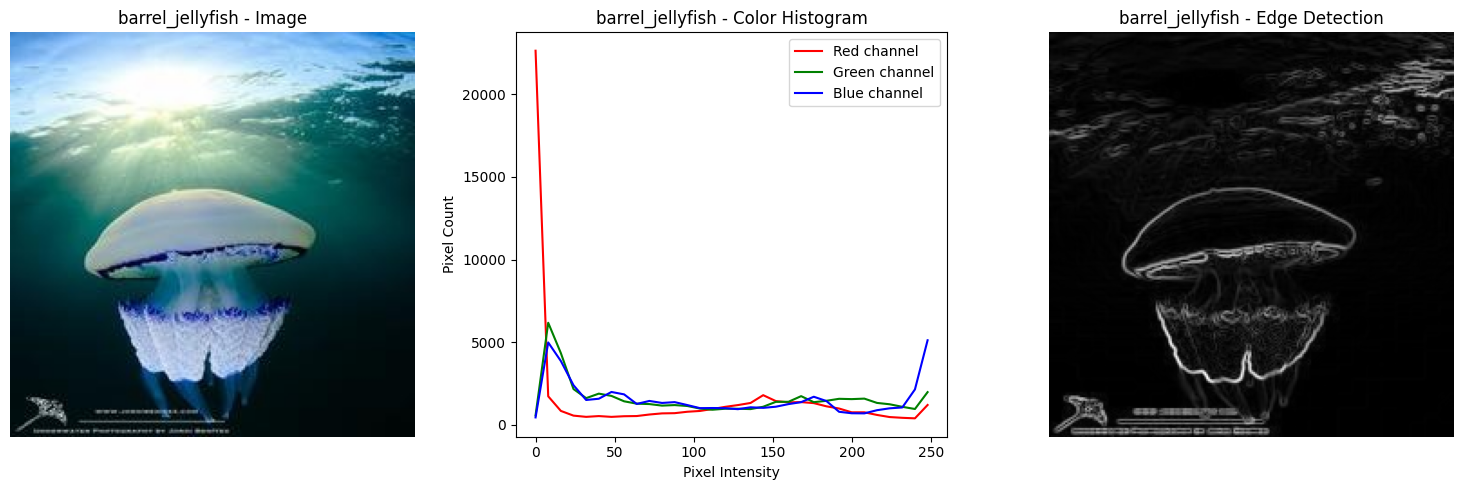

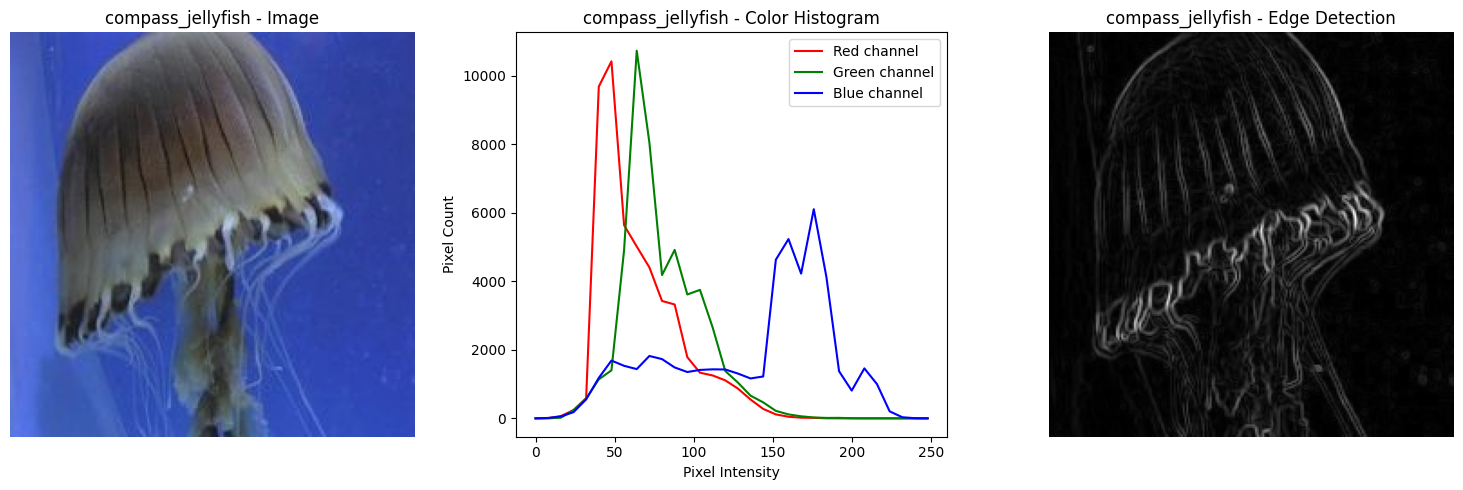

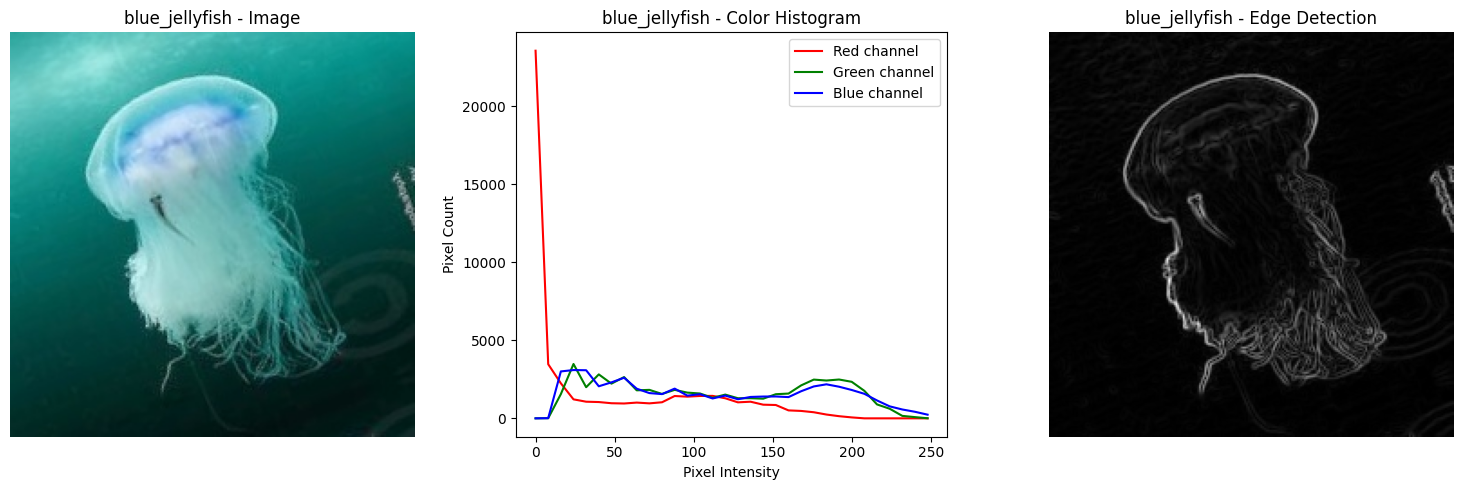

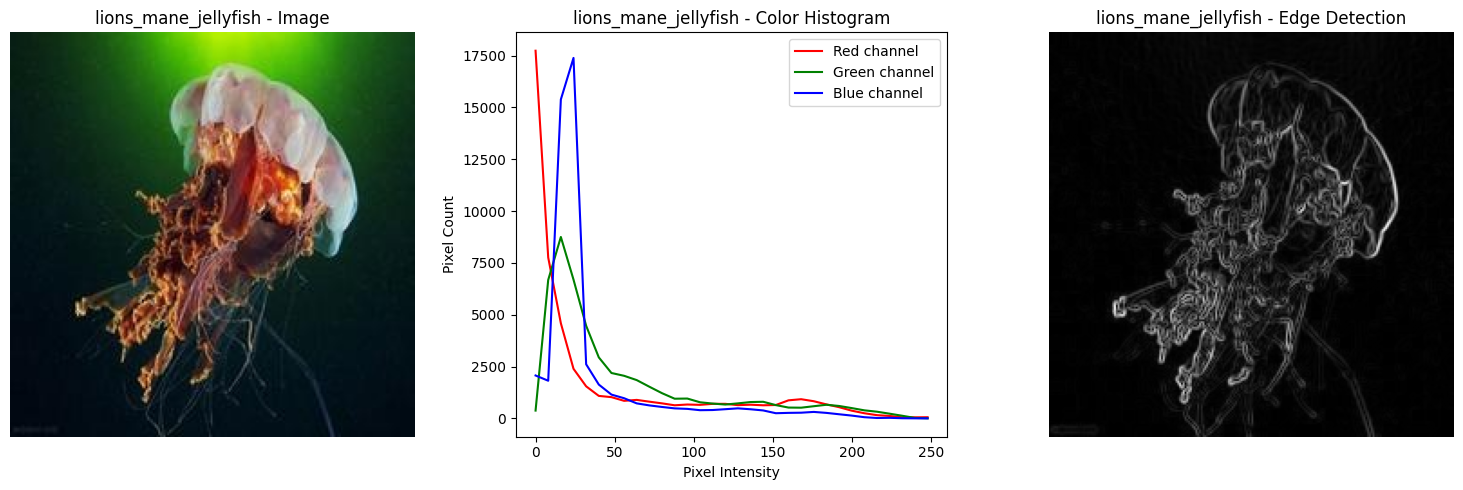

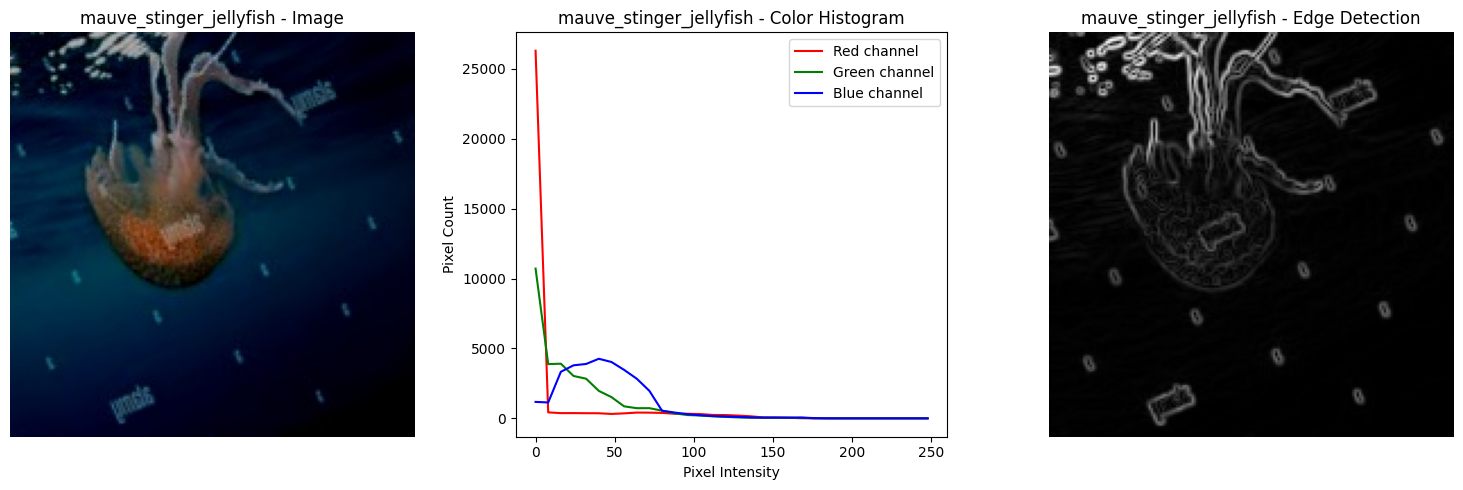

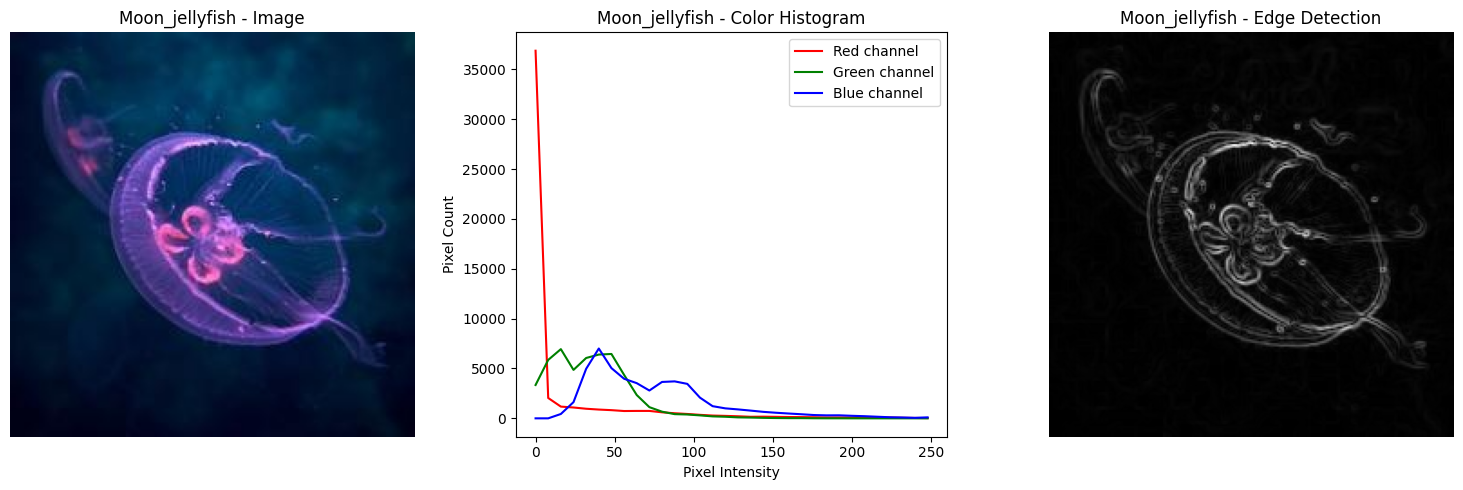

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel

# Load the dataset
dataset_path = '/content/drive/MyDrive/jellyfish/Train_Test_Valid/Train'
species = os.listdir(dataset_path)

# Create visualizations for each species
for specie in species:
    image_paths = os.listdir(os.path.join(dataset_path, specie))
    if not image_paths:
        continue  # Skip if no images are found
    image_path = image_paths[0]
    full_image_path = os.path.join(dataset_path, specie, image_path)
    image = imread(full_image_path)

    # Convert to grayscale for edge detection
    gray_image = rgb2gray(image)
    edges = sobel(gray_image)

    # Create RGB histograms
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    colors = ['red', 'green', 'blue']
    labels = ['Red channel', 'Green channel', 'Blue channel']

    # Plot histograms for each channel
    for i, color in enumerate(colors):
        # Plot histogram
        hist, bin_edges = np.histogram(image[:, :, i], bins=32, range=(0, 256))
        axes[1].plot(bin_edges[:-1], hist, color=color, label=labels[i])

    # Display the original image
    axes[0].imshow(image)
    axes[0].set_title(f'{specie} - Image')
    axes[0].axis('off')

    # Set titles and labels for the histogram
    axes[1].set_title(f'{specie} - Color Histogram')
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Pixel Count')
    axes[1].legend()

    # Edge detection display
    axes[2].imshow(edges, cmap='gray')
    axes[2].set_title(f'{specie} - Edge Detection')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2hsv
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Assuming features are already extracted and stored in 'features' array
# If 'features' are not prepared, include feature extraction logic here



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

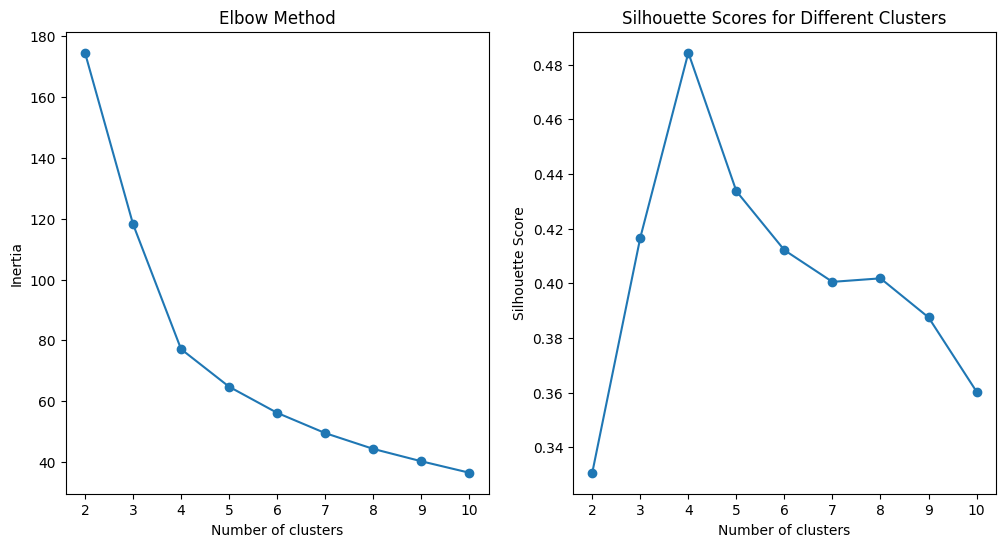

In [23]:
# Elbow Method
inertias = []
silhouette_scores = []
cluster_range = range(2, 11)  # Example range of cluster numbers

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(features)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans_labels))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [24]:
# Number of clusters
k = 4  # Example number, adjust based on your dataset insights

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Evaluate silhouette score
kmeans_silhouette = silhouette_score(features, kmeans_labels)
print(f"K-means Silhouette Score: {kmeans_silhouette}")



# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k)
agglo_labels = agglo.fit_predict(features)

# Evaluate silhouette score
agglo_silhouette = silhouette_score(features, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.48433459015906505
Agglomerative Clustering Silhouette Score: 0.4463287805403483


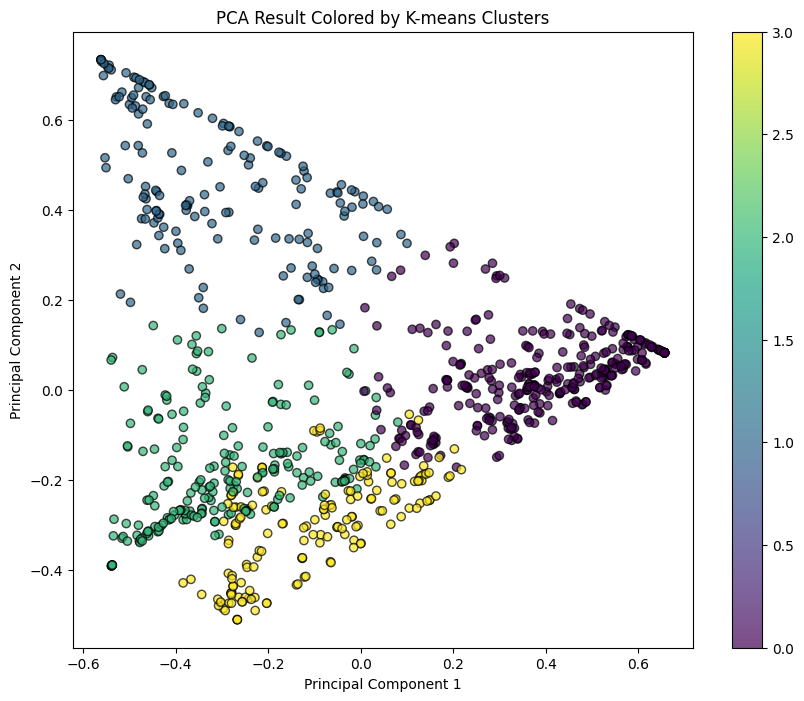

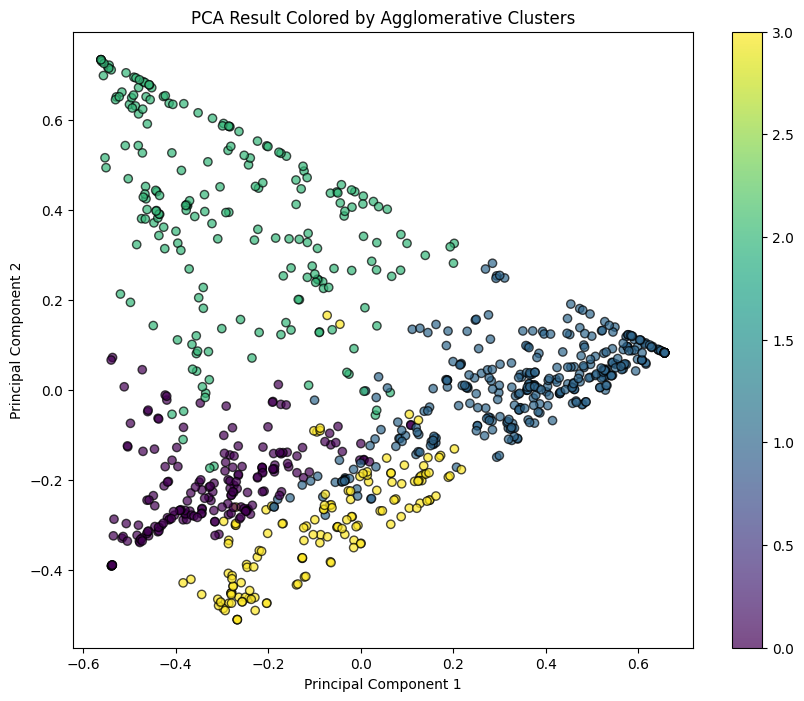

In [25]:
# Reduce dimensionality with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Function to plot clusters
def plot_clusters(reduced_features, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolor='k')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plotting PCA results for K-means clustering
plot_clusters(pca_result, kmeans_labels, 'PCA Result Colored by K-means Clusters')

# Plotting PCA results for Agglomerative clustering
plot_clusters(pca_result, agglo_labels, 'PCA Result Colored by Agglomerative Clusters')

# Function to plot silhouette scores
def plot_silhouette_analysis(features, labels, title):
    silhouette_vals = silhouette_samples(features, labels)
    y_lower, y_upper = 0, 0
    yticks = []
    n_clusters = len(np.unique(labels))

    plt.figure(figsize=(8, 6))
    for i in range(n_clusters):
        ith_cluster_silhouette_vals = silhouette_vals[labels == i]
        ith_cluster_silhouette_vals.sort()
        y_upper += len(ith_cluster_silhouette_vals)
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        yticks.append((y_lower + y_upper) / 2)
        y_lower = y_upper

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, [f'Cluster {i+1}' for i in range(n_clusters)])
    plt.title(title)
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.show()



# Presentation of PCA and K-means Clustering Results

This scatter plot displays our dataset after applying PCA and K-means clustering. PCA reduces our high-dimensional data into two principal components, which are represented on the x-axis and y-axis. These components capture the most significant variances within our dataset.

Each point represents a jellyfish image, with colors indicating the clusters assigned by clustering. The color bar indicates six distinct clusters, ranging from 0 to 5.

# Key Observations:

Clusters show how the data points group together, suggesting similarities within each group.
The separation between clusters helps us understand the distinctiveness of different groups based on their features.
This visualization is a powerful tool for seeing the overall distribution and grouping of our data in a simplified two-dimensional space."

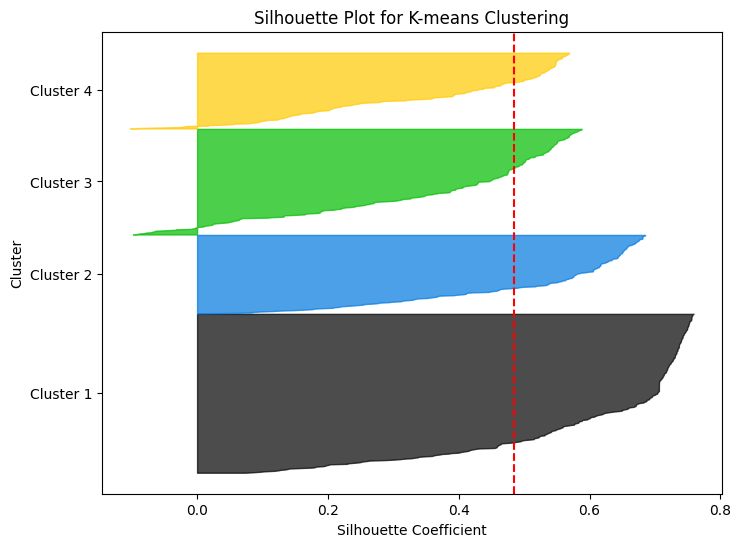

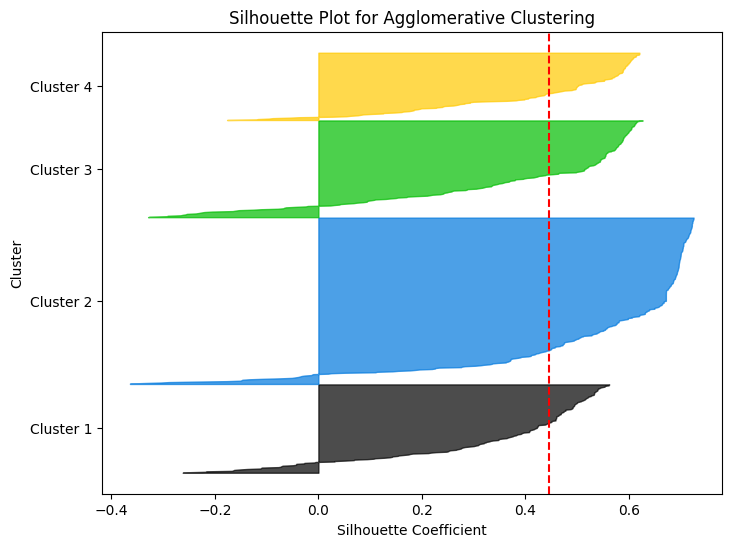

In [26]:

# Plotting silhouette analysis for K-means
plot_silhouette_analysis(features, kmeans_labels, 'Silhouette Plot for K-means Clustering')

# Plotting silhouette analysis for Agglomerative Clustering
plot_silhouette_analysis(features, agglo_labels, 'Silhouette Plot for Agglomerative Clustering')


# Silhouette Plots for K-means and Agglomerative Clustering

These plots show the silhouette scores for each of our 6 clusters using K-means and Agglomerative Clustering.

Key Points:

Silhouette Score: Measures how well points fit their clusters; ranges from -1 to 1.
Closer to 1: Better clustering.
Around 0: Points between clusters.
Negative: Points in the wrong cluster.
Interpretation for K-means:

Red Line: Average silhouette score (~0.4), indicating moderately good clustering.
Color Bars: Each bar represents a point's silhouette score within its cluster.
Interpretation for Agglomerative Clustering:

Red Line: Average silhouette score (~0.4), indicating moderately good clustering.
Color Bars: Each bar represents a point's silhouette score within its cluster.
Overall, these plots help us understand the effectiveness of our clustering methods.

## Results
The K-means clustering grouped jellyfish images into distinct clusters, each potentially representing different species.

Key Observations:

Cluster Density and **Distribution**: Clusters are tightly packed at the bottom, indicating shared characteristics. Vertically spread clusters suggest feature variability.
Overlap and Separation: Some clusters overlap, indicating ambiguous feature distinctions.
Analysis:

Feature Insights: Principal Component 1 (horizontal axis) likely captures color intensity, while Principal Component 2 (vertical axis) represents texture or shape. Dense clusters at the bottom indicate successful similarity capture, while sparse clusters suggest unique features or outliers.
Improvements:

Feature Engineering: Refine or add features like texture or edge information.
Advanced Techniques: Apply PCA for better feature capture and cluster separation.
Optimal Clustering Analysis
Elbow Method and Silhouette Score:

Elbow Method: Optimal number of clusters found at 4.
Silhouette Score: Highest with 4 clusters, indicating better-defined groupings.
Updated Clustering
Adjusting the number of clusters from 6 to 4 improved clustering quality, as indicated by the Elbow Method and Silhouette Score.



## Discussion and Conclusion
The preliminary results indicate that unsupervised learning can effectively cluster jellyfish images, which suggests that species-level identification might be feasible with further refinement of features and clustering algorithms.

## Future Work
- Explore more complex feature extraction methods like texture analysis or deep learning-based embeddings.
- Use advanced clustering techniques like DBSCAN for better grouping efficiency.
- Validate clustering results with expert annotations to assess accuracy.
